<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Solutions_Gaussian_quad_and_2D_Integrals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Integration and interpolation

To date, we've approached numerical estimation by dividing our space to be integrated into a series of equal spaced bins and applying the trapezoidal or Simpson rules to estimate the area under each bin, then adding the respective areas of each bin together. In the trapezoidal rule we made first degree polynomials, and in Simpson's rule we made second degree polynomials. In general, our numerical integrals take the form of:

$\int_a^b f\left(x\right) \approx \sum_{k=1}^N w_k f\left(x_k\right)$


where $f\left(x_k\right)$ is the value of the function at the point $x_k$ and $w_k$ is some weighting factor that depends on the method we're using.

You may have noticed this is analogous to one of the ways we approached interpolation, where if we wanted to know the value of our function $f\left(x\right)$ between given data points, we would locally make a polynomial between those data points and then evaluate the polynomial at $x$.  Indeed, interpolation can be thought of as a "first step" in our integration approaches, since we're making the same polynomials, but this time we're integrating them.  

Given this, you may recall that there was another method we used for interpolation: Legendre Polynomials. The idea of this approach was to use all of the data points to construct a polynomial of the function.

To remind you, here's what we said about Lagrange polynomials:

## Reminder: Interpolation with Lagrange Polynomials:

Polynomials are a useful choice because they are easy to compute and their properties are well known. Given n points, we can always find an (n − 1)st order polynomial that passes through them. This interpolating polynomial is given by the Lagrange formula:

$
P\left(x\right) =  \sum_{k=1}^n \frac{\prod_{j=1\neq k}^n\left(x-x_j \right)}{\prod_{j=1\neq k}^n\left(x_k-x_j\right)} f_k
\\
= \frac{ \left(x-x_2\right) }{\left(x_1-x_2\right)}  \frac{ \left(x-x_3\right) }{\left(x_1-x_3\right)}...\frac{ \left(x-x_n\right) }{\left(x_1-x_n\right)} f_1 
+\frac{ \left(x-x_1\right) }{\left(x_2-x_1\right)}  \frac{ \left(x-x_3\right) }{\left(x_2-x_3\right)}...\frac{ \left(x-x_n\right) }{\left(x_2-x_n\right)} f_2+...
\frac{ \left(x-x_1\right) }{\left(x_n-x_1\right)}  \frac{ \left(x-x_2\right) }{\left(x_n-x_2\right)}...\frac{ \left(x-x_{n-1}\right) }{\left(x_n-x_{n-1}\right)} f_n
$

That's a complicated looking formula.  BUT it's really not that bad. It's just a sum of polynomials, each of which go up to order $n-1$, and when they are added together you get a final polynomial of order $n-1$.  


## Back to today...

We can take the above formula and simplify the notation a bit by defining each individual polynomial by $\phi_k$ as:

$
\phi_k = \frac{\prod_{j=1\neq k}^n\left(x-x_j \right)}{\prod_{j=1\neq k}^n\left(x_k-x_j\right)} $

this lets us clean up our Lagrange polynomial to be written as:

$
P\left(x\right) =  \sum_{k=1}^n \phi_k f\left(x_k\right)$

Remember that $P\left(x\right)$ represents an approximation to our original function we are trying to represent, $f\left(x\right)$.  So if we want the integral of $f\left(x\right)$, we can approximate it with the integral of $P\left(x\right)$ by:

$
\int_a^b f\left(x\right) dx \approx \int_a^b P\left(x\right) dx = \int_a^b  \sum_{k=1}^n \phi_k\left(x\right) f\left(x_k\right) dx =  \sum_{k=1}^n f\left(x_k\right) \int_a^b \phi_k\left(x\right) dx$

Where in the last two steps I replaced the function $P\left(x\right)$ by the polynomials that make it up, and then I swapped the order of the sum and the integral.  If we compare this to the general formula for numerical integration given at the start of this notebook, we see that it takes the same form if we assign the weights of the function to be:

$w_k = \int_a^b \phi_k dx$

This gives us a general way to calculate an integration scheme:  "all" we need to do is to sample at a bunch of points and then to assign them weights, each of which are the integrals of the interpolating polynomials.  Of course, this is quite complicated to do in practice, and for some of the integrals that go into $w_k$ it may be difficult to calculate them exactly.  So at the end of the day, we seem to be in no better position than we started.

But all hope is not lost! The nice thing about this formulism is that if we can compute the points that we are sampling our function, $x_k$, and our weights, $w_k$, once, we can use those same points over and over to estimate the integrals of different functions.  This is similar to what we did with trapezoidal and Simpson's rules, except in those cases we derived the weights $w_k$ and we took the positions $x_k$ as being equally spaced.


## Gaussian Quadrature

The most well-known method for using the above formalism is Gaussian Quadrature, which is named for Carl Gauss (Quadrature was a term used for doing numerical integrals).  Back in his day, there were no electronic computers, so if you wanted to numerically calculate an integral you had to do it by hand.  Because of this, there was a lot of concern with getting the most accurate answer with a small number of points.  We won't derive his method here (for those interested, wikipedia has a good article on this: https://en.wikipedia.org/wiki/Gaussian_quadrature). But to summarize, the idea is this:

Take the interval from -1 to 1.  The points that you should sample your function, $x_k$ corresponds to the roots of the Nth Legendre polynomial (that is, where $P_N\left(x\right) = 0$.  And the weights correspond to:

$w_k = \left[\frac{2}{1-x^2}\left(\frac{dP_N}{dx} \right)^{-2}\right]_{x=x_k}$

Clearly, I don't expect you to memorize this.  The point is that for a polynomial of order $N$ that spans the range of -1 to 1, you can look up the points that you sample, $\{x_k\}$, and the respective weights $\{w_k\}$. The nice part about this is that it is true for ANY function you are integrating.  It doesn’t matter if you’re integrating a polynomial, an exponential, or something that doesn’t even have a functional form: if you want to calculate it with an $N$th degree polynomial you always sample the function at the same set of $x_k$ points and assign the weights $w_k$.

Naturally, python has a function that will help you figure out what those $x_k$ and $w_k$ values are.  In the numpy package, there is a nice function called "leggaus".  Let's import it and play with it below:



In [30]:
from numpy.polynomial.legendre import leggauss
help(leggauss)

Help on function leggauss in module numpy.polynomial.legendre:

leggauss(deg)
    Gauss-Legendre quadrature.
    
    Computes the sample points and weights for Gauss-Legendre quadrature.
    These sample points and weights will correctly integrate polynomials of
    degree :math:`2*deg - 1` or less over the interval :math:`[-1, 1]` with
    the weight function :math:`f(x) = 1`.
    
    Parameters
    ----------
    deg : int
        Number of sample points and weights. It must be >= 1.
    
    Returns
    -------
    x : ndarray
        1-D ndarray containing the sample points.
    y : ndarray
        1-D ndarray containing the weights.
    
    Notes
    -----
    
    .. versionadded:: 1.7.0
    
    The results have only been tested up to degree 100, higher degrees may
    be problematic. The weights are determined by using the fact that
    
    .. math:: w_k = c / (L'_n(x_k) * L_{n-1}(x_k))
    
    where :math:`c` is a constant independent of :math:`k` and :math:`x_k`
    is t

Note what it is doing, if you give this function an integer, it will return two arrays: x and y, which correspond to our $x_k$ and $w_k$ points and weights.

**Activity:** run the leggauss function with several different values of $N$ as an input and examine the outputs.  Check that they represent the data given in the first table here: https://en.wikipedia.org/wiki/Gaussian_quadrature

In [31]:
leggauss(3)

(array([-0.77459667,  0.        ,  0.77459667]),
 array([0.55555556, 0.88888889, 0.55555556]))

Again, note that the range of points you are sampling from is constrained from -1 to 1.  If you want to calculate the integral over a different range, you need to do a linear transformation of the $x_k$ points.  To do this, take each of your $x_k$ points from the above function and apply the linear equation:

$x_{new}=x_k \cdot\frac{b-a}{2}+\frac{b+a}{2}$

Similarly, you will need to scale the corresponding weights since the width of your integral changes by:

$w_{new}=w_k \cdot\frac{b-a}{2}$

**Activity:** A week ago we calculated the integral of the function:

$
f\left(x\right) = x^5 + 3\cdot x^3 + 2
$

for $1\leq x \leq  5$. Using Simpson's and the trapezoidal rule.  Repeat that calculation, but this time use Gaussian quadrature.  You may wish to go back to your code from last week and copy it as a starting place.  Try this for $N=1$ to $N=10$.  How many points do you need to get an accurate result? 

In [32]:
import numpy as np 
from numpy.polynomial.legendre import leggauss

User defined variables

a: minimum value of integral range

b: maximum value of integral range

N: number of slices


In [33]:
a = 1.0
b = 5.0

Function for the function being integrated.  Also a function for the analytic result.

In [34]:
def f(x):
  return x**5 + 3.0*x**3 +2.0

def f_I(x):
  return 1.0/6.0 * x**6 + 3.0/4.0*x**4 +2.0*x

For a range of $N$ values, perform Gaussian quadrature.  First we find the x values and their corresponding weights, then we scale them to match the range over which we want to integrate.  Finally, we add up the sum of the weights and the function sampled at these points.  Note that we only need $N=3$ to get a good estimate!  That's likely because our data comes from a polynomial, so a global polynomial fit does a nice job.

In [35]:
for N in range(1,11):
  x_k, w_k = leggauss(N)
  x_new = x_k*(b-a)*0.5+(b+a)*0.5
  w_new = w_k*(b-a) * 0.5
  y = f(x_new)
  integrand_gauss = np.sum(w_new * y)
  print("The integrand for N=",N, "points is approximately:", integrand_gauss)

  exact_integral = f_I(b)-f_I(a)
  print("The integrand is exactly:", exact_integral)


The integrand for N= 1 points is approximately: 1304.0
The integrand is exactly: 3080.0
The integrand for N= 2 points is approximately: 2994.6666666666665
The integrand is exactly: 3080.0
The integrand for N= 3 points is approximately: 3080.000000000001
The integrand is exactly: 3080.0
The integrand for N= 4 points is approximately: 3079.9999999999986
The integrand is exactly: 3080.0
The integrand for N= 5 points is approximately: 3080.000000000001
The integrand is exactly: 3080.0
The integrand for N= 6 points is approximately: 3079.999999999999
The integrand is exactly: 3080.0
The integrand for N= 7 points is approximately: 3080.0000000000045
The integrand is exactly: 3080.0
The integrand for N= 8 points is approximately: 3080.000000000002
The integrand is exactly: 3080.0
The integrand for N= 9 points is approximately: 3080.000000000002
The integrand is exactly: 3080.0
The integrand for N= 10 points is approximately: 3079.999999999999
The integrand is exactly: 3080.0


# Multiple Integrals:

To date, we've dealt primarily with integrals that are over only one variable.  However, there are many times in physics that you'll encounter a multidimensional integral that looks something like this:

$I = \int_{y_{min}}^{y_{max}} \int_{x_{min}}^{x_{max}} f\left(x,y\right) dx dy $

Although this looks more complicated, we can in general apply the same numerical approaches that we've taken before (trapezoidal, Simpson's, Gaussian Quadrature).  The conceptually simplest way to do this is to break the above into the following formulas:

$F\left(y\right) =\int_{x_{min}}^{x_{max}} f\left(x,y\right) dx $

and then to calculate:

$I = \int_{y_{min}}^{y_{max}} F\left(y\right) dy $

Conceptually, what this says is to calculate our integral, we need to pick a set of $y$ values to evaluate the function $F\left(y\right)$ at, and then for each of those $y_k$ points we should evaluate the integral for $F\left(y\right)$.  This can be done using nested for loops.  For example, if you had a set of $x_k$ and $y_k$ points with weights $w_{x,k}$ and $w_{y,k}$, your code might look something like this

```
sum = 0.0
for i in range(N):
  sum_y = 0.0
  for j in range(N):
    sum_y = sum_y + w_x[j] * f(x_k[j],y_k[i])
  sum = sum + w_y[i] * sum_y
print(sum)
```

Note why this is working.  It takes a series of y values, and for each y value computes the corresponding integral over the $x$ values.  For example, below is a sampling of points from doing Gaussian quadrature in 2D.  Effectively the code computes the integral over each row of points one at a time and then adds those integrals up.

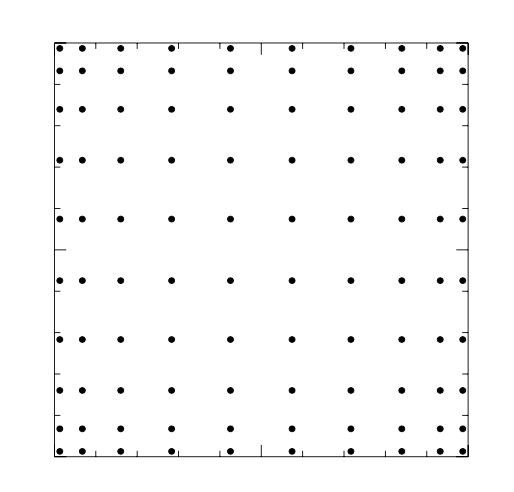

Note that while Gaussian quadrature is the best choice for 1D integrals, for higher dimensional integrals there is no general answer about what approach is best.  This is especially problematic when you get into higher dimensional systems (for example, you can easily get in situations where you need to integrate over 10 variables) where it can be hard to pick the $f_k$ points to sample, along with their weights.  Later in the course we'll see another method, Monte Carlo integration, which takes advantage of random numbers to compute these integrals.

**Activity:** Compute the integral of the function:

$
f\left(x\right) = e^{-\left(x^2+y^2\right)}
$

over the range of $-2\leq x \leq 2$ and $-2\leq y \leq 2$ using the above formalism. You should get about 3.11227.  You can use any integration method you want, but I'd suggest Gaussian quadrature.   It may help to plot the function first (for help, refer back to our activity on gradients).  

In [36]:
import numpy as np
import matplotlib.pyplot as plt

Set the min and max values along $x$ and $y$, along with the number of gridpoints to use

In [37]:
x_min = -2.0
x_max =  2.0
y_min = -2.0
y_max =  2.0
dx    =  201 #for plotting only
dy    =  201 #for plotting only
N_x   =  10
N_y   =  10

Define our function:

In [38]:
def f(x,y):
  return np.exp(-1 * (x**2 + y**2))

First lets plot the function:

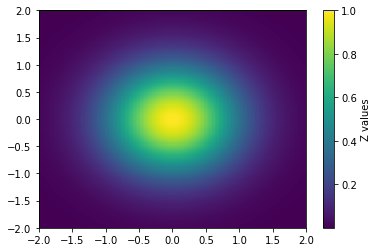

In [39]:
x = np.linspace(x_min,x_max,dx)
y = np.linspace(y_min,y_max,dy)
X, Y = np.meshgrid(x,y)
Z=f(X,Y)
plt.pcolormesh(X,Y,Z)
plt.colorbar(label='Z values')
plt.show()

Now calculate the integral using Gaussian quadrature in 2D.  Note that we have to be careful to expand both the intervals over which we do the integration from -1 to 1 to the appropriate range.

In [41]:
x_k, w_xk = leggauss(N_x)
y_k, w_yk = leggauss(N_y)
x_new = x_k*(x_max-x_min)*0.5+(x_max+x_min)*0.5
w_newx = w_xk*(x_max-x_min) * 0.5
y_new = y_k*(y_max-y_min)*0.5+(y_max+y_min)*0.5
w_newy = w_yk*(y_max-y_min) * 0.5

sum = 0.0
for i in range(N_y):
  sum_y = 0.0
  for j in range(N_x):
    sum_y += w_newx[j]*f(x_new[j],y_new[i])
  sum += w_newy[i]*sum_y

print("The integrand is approximately:", sum)

The integrand is approximately: 3.112269352254014
